In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import math

def generateDataFrames(filename):
    times = [[], [], [], [], [], [], [], []]

    with open(filename, 'r') as file:
        for line in file:
            data = line.strip().split(',')
            for idx, value in enumerate(data):
                times[idx % 7].append(float(value.strip()))

    df = pd.DataFrame({
        'load': times[0],
        'broadcast': times[1],
        'scatter': times[2],
        'lock_init': times[3],
        'spmv': times[4],
        'reduce': times[5],
        'store': times[6],
    })

    return df

def filterData(df):
    for time_col in ['load', 'broadcast', 'scatter', 'lock_init', 'spmv', 'reduce', 'store']:
        Q1 = df[time_col].quantile(0.25)
        Q3 = df[time_col].quantile(0.75)
        IQR = Q3 - Q1

        # Apply IQR filtering to each column
        df = df[~((df[time_col] < (Q1 - 1.5 * IQR)) | (df[time_col] > (Q3 + 1.5 * IQR)))]

    return df

def add_execution_times(pairs, label=None, color='black', style=''):
    pairs.sort(key=lambda x: int(x[0]))

    cores = [int(pair[0]) for pair in pairs]
    times = [pair[1] for pair in pairs]

    plt.plot(cores, times, style, label=label, color=color)
    store
    if label:
        plt.legend()


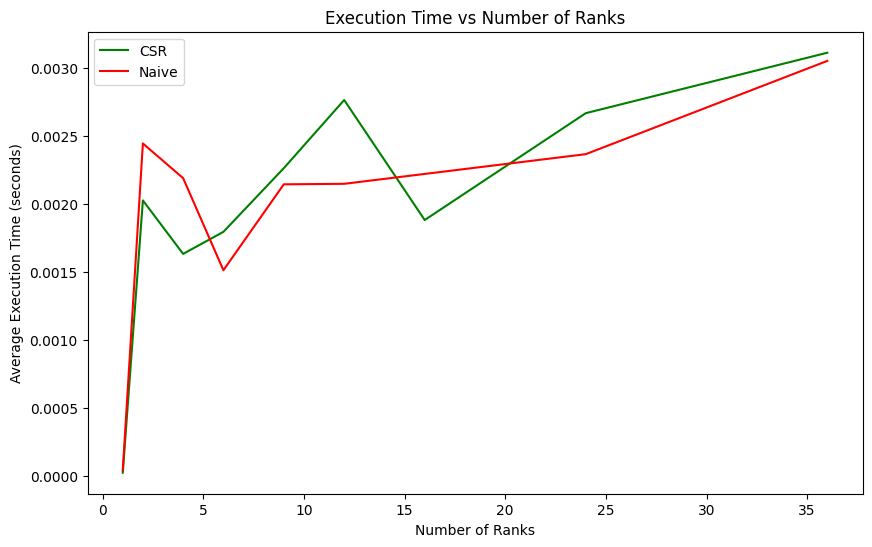

In [10]:
data_filepath = 'results/'

plt.figure(figsize=(10, 6))
plt.xlabel('Number of Ranks')
plt.ylabel('Average Execution Time (seconds)')
#plt.yscale('log')

plt.title('Execution Time vs Number of Ranks')
"""
pairs = []
for filename in os.listdir(data_filepath):
    data = generateDataFrames(data_filepath + filename)
    data = filterData(data)
    pair = (filename.split(".")[0], data["spmv_csr_gpu"].mean())
    pairs.append(pair)

add_execution_times(pairs, "CSR", "blue")
"""
pairs = []
for filename in os.listdir(data_filepath):
    data = generateDataFrames(data_filepath + filename)
    data = filterData(data)
    pair = (filename.split(".")[0], data["broadcast"].mean())
    pairs.append(pair)

add_execution_times(pairs, "CSR", "green")

data_filepath = 'naiveresults/'
pairs = []
for filename in os.listdir(data_filepath):
    data = generateDataFrames(data_filepath + filename)
    data = filterData(data)
    pair = (filename.split(".")[0], data["broadcast"].mean())
    pairs.append(pair)

add_execution_times(pairs, "Naive", "red")




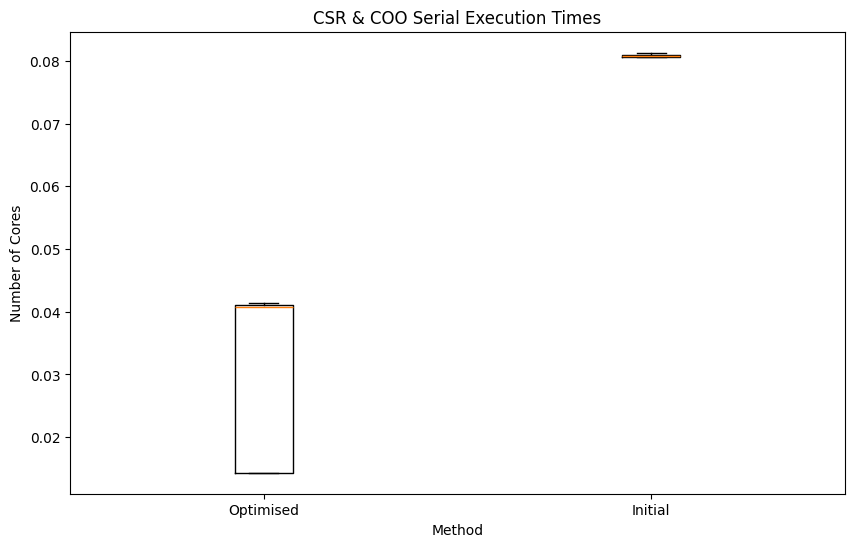

In [30]:
data_filepath = 'results/'

plt.figure(figsize=(10, 6))
plt.xlabel('Method')
plt.ylabel('Number of Cores')
plt.title('CSR & COO Serial Execution Times')

vals1 = []
data = generateDataFrames('fastresults/48.txt')
vals1.extend(data["spmv_ell_gpu"].values)
    
# COO Serial Execution Times
vals2 = []
data = generateDataFrames('slowresults/48.txt')
vals2.extend(data["spmv_ell_gpu"].values)
    
plt.boxplot([vals1, vals2], positions=[1, 2])

plt.xticks([1, 2], ['Optimised', 'Initial'])

plt.show()

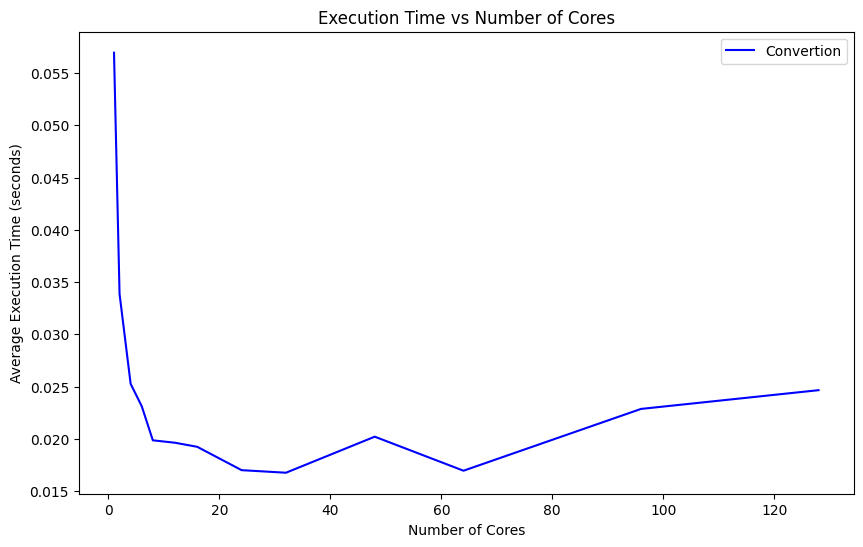

In [ ]:
data_filepath = 'results/'

plt.figure(figsize=(10, 6))
plt.xlabel('Number of Cores')
plt.ylabel('Average Execution Time (seconds)')
#plt.yscale('log')

plt.title('Execution Time vs Number of Cores')

pairs = []
for filename in os.listdir(data_filepath):
    data = generateDataFrames(data_filepath + filename)
    data = filterData(data)
    pair = (filename.split(".")[0], data["convert"].mean())
    pairs.append(pair)

add_execution_times(pairs, "Conversion", "blue")
 